In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


## Data Proccesing

In [2]:
MEDford_df = pd.read_csv('MEdford_US_Data_2015-2018_EDITED.csv') 
MEDford_df

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2015      1    1     0      30    0             0           0   
1      2015      1    1     1      30    0             0           0   
2      2015      1    1     2      30    0             0           0   
3      2015      1    1     3      30    0             0           0   
4      2015      1    1     4      30    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35035  2018     12   31    19      30    0             0           7   
35036  2018     12   31    20      30    0             0           7   
35037  2018     12   31    21      30    0             0           7   
35038  2018     12   31    22      30    0             0           4   
35039  2018     12   31    23      30    0             0           7   

       Wind Speed  Relative Humidity  Temperature  Pressure  
0             0.4              85.18         -1.0       970  
1             0.4              83.54         -1.0       970  
2             0.4              82.07         -1.0       970  
3             0.4              80.75         -1.0       970  
4             0.4              79.63         -2.0       970  
...           ...                ...          ...       ...  
35035         0.5              81.77          7.9       967  
35036         0.5              81.06          7.9       968  
35037         0.6              79.58          8.2       969  
35038         0.6              78.96          8.4       969  
35039         0.7              79.82          8.2       969  

[35040 rows x 12 columns]

In [3]:
MEDford_df = MEDford_df.dropna()
MEDford_df

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2015      1    1     0      30    0             0           0   
1      2015      1    1     1      30    0             0           0   
2      2015      1    1     2      30    0             0           0   
3      2015      1    1     3      30    0             0           0   
4      2015      1    1     4      30    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35035  2018     12   31    19      30    0             0           7   
35036  2018     12   31    20      30    0             0           7   
35037  2018     12   31    21      30    0             0           7   
35038  2018     12   31    22      30    0             0           4   
35039  2018     12   31    23      30    0             0           7   

       Wind Speed  Relative Humidity  Temperature  Pressure  
0             0.4              85.18         -1.0       970  
1             0.4              83.54         -1.0       970  
2             0.4              82.07         -1.0       970  
3             0.4              80.75         -1.0       970  
4             0.4              79.63         -2.0       970  
...           ...                ...          ...       ...  
35035         0.5              81.77          7.9       967  
35036         0.5              81.06          7.9       968  
35037         0.6              79.58          8.2       969  
35038         0.6              78.96          8.4       969  
35039         0.7              79.82          8.2       969  

[35040 rows x 12 columns]

In [4]:
MEDford_df_RF = pd.read_csv('MEdford_US_Data_2015-2018_RF.csv') 
MEDford_df_RF

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  \
0      2015      1    1     0      30    0             0           0   
1      2015      1    1     1      30    0             0           0   
2      2015      1    1     2      30    0             0           0   
3      2015      1    1     3      30    0             0           0   
4      2015      1    1     4      30    0             0           0   
...     ...    ...  ...   ...     ...  ...           ...         ...   
35012  2018     12   30    20      30    0             0           0   
35013  2018     12   30    21      30    0             0           0   
35014  2018     12   30    22      30    0             0           0   
35015  2018     12   30    23      30    0             0           0   
35016  2018     12   31     0      30    0             0           8   

       Wind Speed  Relative Humidity  Temperature  Pressure  GHI_Day_Ahead  
0             0.4              85.18         -1.0       970              0  
1             0.4              83.54         -1.0       970              0  
2             0.4              82.07         -1.0       970              0  
3             0.4              80.75         -1.0       970              0  
4             0.4              79.63         -2.0       970              0  
...           ...                ...          ...       ...            ...  
35012         0.1              83.23          2.9       969              0  
35013         0.1              83.75          2.7       969              0  
35014         0.1              83.67          2.4       969              0  
35015         0.1              83.41          2.1       970              0  
35016         0.1              83.73          1.9       970              0  

[35017 rows x 13 columns]

In [5]:
Corr = MEDford_df_RF.corr()
Corr['GHI_Day_Ahead']

Year                 0.001864
Month               -0.028440
Day                  0.006583
Hour                 0.118228
Minute                    NaN
GHI                  0.887160
Clearsky GHI         0.894439
Cloud Type          -0.177922
Wind Speed          -0.064608
Relative Humidity   -0.643953
Temperature          0.651780
Pressure            -0.025800
GHI_Day_Ahead        1.000000
Name: GHI_Day_Ahead, dtype: float64

In [6]:
MEDford_df_new = MEDford_df.copy()

MEDford_df_new['DateTime'] = MEDford_df[['Year', 'Month', 'Day', 'Hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
MEDford_df_new = MEDford_df_new.drop(columns = ['Year','Minute'])
MEDford_df_new['DateTime'] = pd.to_datetime(MEDford_df_new['DateTime']) 
MEDford_df_new.set_index(['DateTime'], drop=True, inplace=True)
MEDford_df_new.head(15)

Month  Day  Hour  GHI  Clearsky GHI  Cloud Type  \
DateTime                                                               
2015-01-01 00:00:00      1    1     0    0             0           0   
2015-01-01 01:00:00      1    1     1    0             0           0   
2015-01-01 02:00:00      1    1     2    0             0           0   
2015-01-01 03:00:00      1    1     3    0             0           0   
2015-01-01 04:00:00      1    1     4    0             0           0   
2015-01-01 05:00:00      1    1     5    0             0           0   
2015-01-01 06:00:00      1    1     6    0             0           0   
2015-01-01 07:00:00      1    1     7    0             0           0   
2015-01-01 08:00:00      1    1     8   93            93           0   
2015-01-01 09:00:00      1    1     9  236           236           0   
2015-01-01 10:00:00      1    1    10  351           351           0   
2015-01-01 11:00:00      1    1    11  419           419           0   
2015-01-01 12:00:00      1    1    12  432           432           0   
2015-01-01 13:00:00      1    1    13  389           389           0   
2015-01-01 14:00:00      1    1    14  296           296           0   

                     Wind Speed  Relative Humidity  Temperature  Pressure  
DateTime                                                                   
2015-01-01 00:00:00         0.4              85.18         -1.0       970  
2015-01-01 01:00:00         0.4              83.54         -1.0       970  
2015-01-01 02:00:00         0.4              82.07         -1.0       970  
2015-01-01 03:00:00         0.4              80.75         -1.0       970  
2015-01-01 04:00:00         0.4              79.63         -2.0       970  
2015-01-01 05:00:00         0.4              78.93         -2.0       970  
2015-01-01 06:00:00         0.4              78.75         -2.0       970  
2015-01-01 07:00:00         0.4              72.82         -1.0       970  
2015-01-01 08:00:00         0.4              66.16          0.0       970  
2015-01-01 09:00:00         0.3              63.72          2.0       970  
2015-01-01 10:00:00         0.3              65.71          5.0       970  
2015-01-01 11:00:00         0.3              70.69          7.0       960  
2015-01-01 12:00:00         0.2              75.98          8.0       960  
2015-01-01 13:00:00         0.2              80.02          8.0       960  
2015-01-01 14:00:00         0.3              95.09          7.0       960

## Benchmark Model
### Day a Head Persistance (yesterday like today)

In [7]:
def Persistence(df):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(0, df.shape[0]-24):
        row = df_as_np[i,3]
        X.append(row)
        label = df_as_np[i+24,3]
        y.append(label)
    return np.array(X), np.array(y)

In [8]:
X_Bench, Y_Bench = Persistence(MEDford_df_new)
BenchMarkModel = pd.DataFrame(data = {'Test prediction':X_Bench,'Actual':Y_Bench })
BenchMarkModel.index = MEDford_df_new.index[0:35016]
BenchMarkModel

Test prediction  Actual
DateTime                                    
2015-01-01 00:00:00              0.0     0.0
2015-01-01 01:00:00              0.0     0.0
2015-01-01 02:00:00              0.0     0.0
2015-01-01 03:00:00              0.0     0.0
2015-01-01 04:00:00              0.0     0.0
...                              ...     ...
2018-12-30 19:00:00              0.0     0.0
2018-12-30 20:00:00              0.0     0.0
2018-12-30 21:00:00              0.0     0.0
2018-12-30 22:00:00              0.0     0.0
2018-12-30 23:00:00              0.0     0.0

[35016 rows x 2 columns]

#### Benchmark Model: Actual vs Predicted

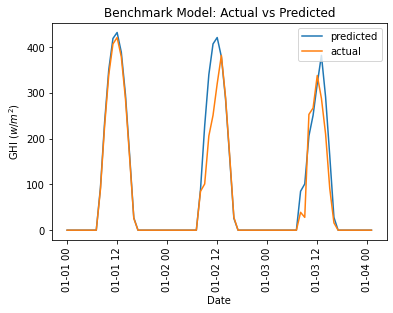

In [9]:
plt.plot(BenchMarkModel['Test prediction'][0:74],label = 'predicted')
plt.plot(BenchMarkModel['Actual'][0:74],label = 'actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('Benchmark Model: Actual vs Predicted')
_=plt.xticks(rotation = 90)

plt.legend()

#### Bench Mark model score:

In [10]:
from sklearn.metrics import r2_score
print('Testing score:', r2_score(BenchMarkModel['Actual'],BenchMarkModel['Test prediction']))

C:\Users\Hamza\anaconda3\envs\ml_proj\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Testing score: 0.8522206191310964


In [11]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(0, df.shape[0]-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size,3]
        y.append(label)
    return np.array(X), np.array(y)

### Time Series

Text(0, 0.5, 'GHI ($w/m^2$)')

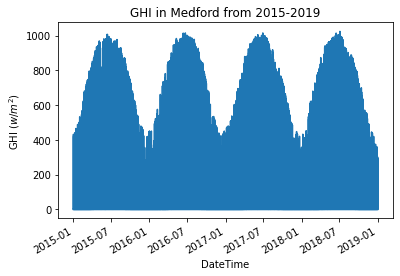

In [12]:
GHI = MEDford_df_new['GHI']
GHI.plot()
plt.title('GHI in Medford from 2015-2019')
plt.ylabel('GHI ($w/m^2$)')

## LTSM 24 hour ahead

In [13]:
def df_to_X_y_24(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(0, df.shape[0]-window_size-24):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size+24,3]
        y.append(label)
    return np.array(X), np.array(y)

In [14]:
window_size = 24
X,y = df_to_X_y_24(MEDford_df_new, 24)
X.shape, y.shape


((34992, 24, 1, 10), (34992,))

In [15]:
m,n = X.shape[::3]
X = np.rollaxis(X,3,1).reshape(m,-1,n)
X.shape


(34992, 24, 10)

In [16]:
X_train, X_test, Y_train, Y_test = X[:26244],X[26244:], y[:26244], y[26244:] # Testing: from 30/12/2017 - 31/ 12/ 2018
print('Shape of X_train set:',X_train.shape) 
print('Shape of Y_train set:',Y_train.shape)
print('Shape of X_test set:',X_test.shape)
print('Shape of Y_test set:',Y_test.shape)
y

Shape of X_train set: (26244, 24, 10)
Shape of Y_train set: (26244,)
Shape of X_test set: (8748, 24, 10)
Shape of Y_test set: (8748,)


array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((24,10)))
model2.add(LSTM(100))
model2.add(Dense(10,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45,421
Trainable params: 45,421
Non-trainable params: 0
_________________________________________________________________


In [18]:
cp = ModelCheckpoint('model2/',save_best_only =True)
model2.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate = 0.0001), metrics = RootMeanSquaredError()) 

In [19]:
import timeit
start = timeit.default_timer()
model2.fit(X_train,Y_train, epochs = 30, callbacks = [cp])
stop = timeit.default_timer()
print('Time: ', stop - start)

Epoch 1/30
821/821 [==============================] - 12s 11ms/step - loss: 109248.5000 - root_mean_squared_error: 330.5276
Epoch 2/30
821/821 [==============================] - 9s 11ms/step - loss: 103352.1406 - root_mean_squared_error: 321.4843
Epoch 3/30
821/821 [==============================] - 9s 11ms/step - loss: 94182.7188 - root_mean_squared_error: 306.8920
Epoch 4/30
821/821 [==============================] - 9s 11ms/step - loss: 81592.7656 - root_mean_squared_error: 285.6445
Epoch 5/30
821/821 [==============================] - 9s 11ms/step - loss: 68838.4531 - root_mean_squared_error: 262.3708
Epoch 6/30
821/821 [==============================] - 9s 11ms/step - loss: 56911.1016 - root_mean_squared_error: 238.5605
Epoch 7/30
821/821 [==============================] - 10s 12ms/step - loss: 46220.2578 - root_mean_squared_error: 214.9890
Epoch 8/30
821/821 [==============================] - 10s 12ms/step - loss: 37018.3750 - root_mean_squared_error: 192.4016
Epoch 9/30
821/821 

Epoch 28/30
821/821 [==============================] - 9s 11ms/step - loss: 7058.9399 - root_mean_squared_error: 84.0175
Epoch 29/30
821/821 [==============================] - 9s 11ms/step - loss: 6987.7568 - root_mean_squared_error: 83.5928
Epoch 30/30
821/821 [==============================] - 9s 11ms/step - loss: 7007.8013 - root_mean_squared_error: 83.7126
Time:  273.7711284


#### Comparision between Actual and Train predictions - LSTM

In [20]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train prediction':train_predictions,'Actual':Y_train }, index = MEDford_df_new.index[:26244])
train_results


821/821 [==============================] - 4s 5ms/step


Train prediction  Actual
DateTime                                     
2015-01-01 00:00:00         -5.206038     0.0
2015-01-01 01:00:00         -3.633340     0.0
2015-01-01 02:00:00         -0.872056     0.0
2015-01-01 03:00:00         -0.069617     0.0
2015-01-01 04:00:00         -0.243221     0.0
...                               ...     ...
2017-12-30 07:00:00         -2.734896     0.0
2017-12-30 08:00:00         66.783096    55.0
2017-12-30 09:00:00        115.522446   110.0
2017-12-30 10:00:00        192.406433   153.0
2017-12-30 11:00:00        232.020737   157.0

[26244 rows x 2 columns]

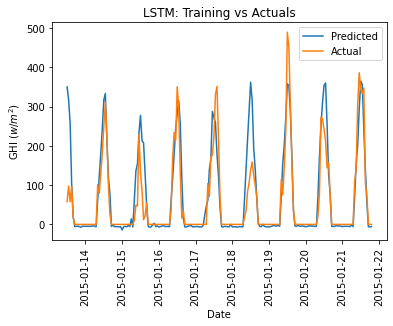

In [21]:
plt.plot(train_results['Train prediction'][300:500], label = 'Predicted')
plt.plot(train_results['Actual'][300:500], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM: Training vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

#### Comparision between Actual and Test predictions - LSTM

In [22]:
test_predictions = model2.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'Test prediction':test_predictions,'Actual':Y_test },index = MEDford_df_new.index[26292:])
test_results

274/274 [==============================] - 1s 5ms/step


Test prediction  Actual
DateTime                                    
2018-01-01 12:00:00       251.147903   167.0
2018-01-01 13:00:00       241.035080   175.0
2018-01-01 14:00:00       216.911346   151.0
2018-01-01 15:00:00        85.212036    73.0
2018-01-01 16:00:00        -2.954518    13.0
...                              ...     ...
2018-12-31 19:00:00        -5.833460     0.0
2018-12-31 20:00:00        -5.872405     0.0
2018-12-31 21:00:00        -6.164852     0.0
2018-12-31 22:00:00        -5.218452     0.0
2018-12-31 23:00:00        -6.044547     0.0

[8748 rows x 2 columns]

#### Testing Prediction vs Actuals - LSTM

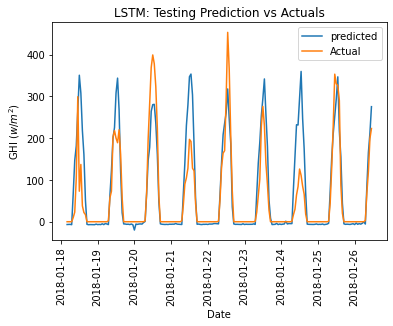

In [23]:
plt.plot(test_results['Test prediction'][400:600],label = 'predicted')
plt.plot(test_results['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

#### Training and Testing scores of LSTM 

In [24]:
from sklearn.metrics import r2_score
print('Training score:', r2_score(Y_train, train_results['Train prediction'] ))
print('Testing score:', r2_score(test_results['Actual'], test_results['Test prediction']))
test_results.corr()['Test prediction']

Training score: 0.9112412999119457
Testing score: 0.9024785795932292


Test prediction    1.000000
Actual             0.950657
Name: Test prediction, dtype: float64

## Scenario 2

##### Winter: 12 ,1 ,2 
##### Spring: 3,4,5
##### Summer: 6,7,8
##### Fall : 9,10,11

In [25]:
Fall_LSTM = test_results['2018-9-1 01:00:00': '2018-11-30 23:00:00']
Spring_LSTM =test_results['2018-3-1 01:00:00': '2018-5-31 23:00:00']
Summer_LSTM = test_results['2018-6-1 01:00:00': '2018-8-31 23:00:00']
W = test_results['2018-1-1 01:00:00': '2018-2-28 23:00:00']
W.values.tolist()
Winter_LSTM = W.append(test_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])
Winter_LSTM

C:\Users\Hamza\AppData\Local\Temp\ipykernel_14224\3938544548.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Winter_LSTM = W.append(test_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])


Test prediction  Actual
DateTime                                    
2018-01-01 12:00:00       251.147903   167.0
2018-01-01 13:00:00       241.035080   175.0
2018-01-01 14:00:00       216.911346   151.0
2018-01-01 15:00:00        85.212036    73.0
2018-01-01 16:00:00        -2.954518    13.0
...                              ...     ...
2018-12-31 19:00:00        -5.833460     0.0
2018-12-31 20:00:00        -5.872405     0.0
2018-12-31 21:00:00        -6.164852     0.0
2018-12-31 22:00:00        -5.218452     0.0
2018-12-31 23:00:00        -6.044547     0.0

[2147 rows x 2 columns]

In [26]:
%store Fall_LSTM
%store Spring_LSTM
%store Summer_LSTM
%store Winter_LSTM

Stored 'Fall_LSTM' (DataFrame)
Stored 'Spring_LSTM' (DataFrame)
Stored 'Summer_LSTM' (DataFrame)
Stored 'Winter_LSTM' (DataFrame)


#### Winter

LSTM Winter Testing score: 0.7523940425660978


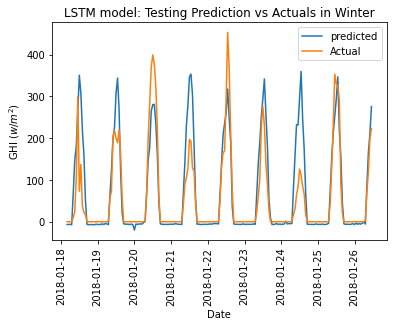

In [27]:
plt.plot(Winter_LSTM['Test prediction'][400:600],label = 'predicted')
plt.plot(Winter_LSTM['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Winter')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Winter Testing score:', r2_score(Winter_LSTM['Actual'], Winter_LSTM['Test prediction']))

#### Summer

LSTM Summer Testing score: 0.9626609058331874


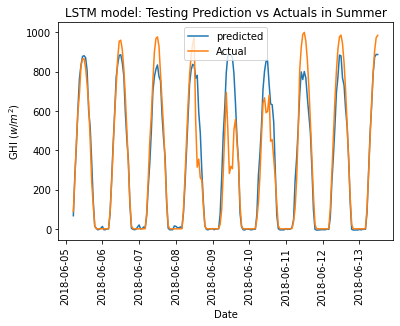

In [28]:
plt.plot(Summer_LSTM['Test prediction'][100:300],label = 'predicted')
plt.plot(Summer_LSTM['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Summer')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Summer Testing score:', r2_score(Summer_LSTM['Actual'], Summer_LSTM['Test prediction']))

#### Spring

LSTM Spring Testing score: 0.804720695194234


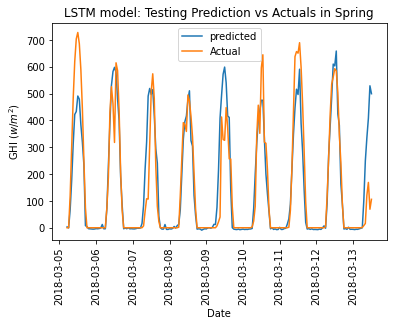

In [29]:
plt.plot(Spring_LSTM['Test prediction'][100:300],label = 'predicted')
plt.plot(Spring_LSTM['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Spring')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Spring Testing score:', r2_score(Spring_LSTM['Actual'], Spring_LSTM['Test prediction']))

#### Fall

LSTM Fall Testing score: 0.9098048443106749


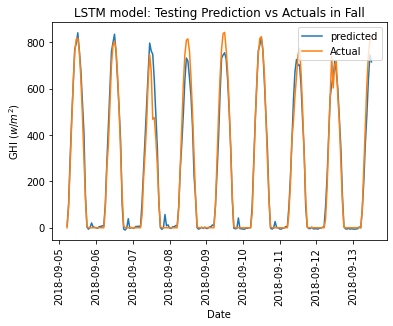

In [30]:
plt.plot(Fall_LSTM['Test prediction'][100:300],label = 'predicted')
plt.plot(Fall_LSTM['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Fall')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Fall Testing score:', r2_score(Fall_LSTM['Actual'], Fall_LSTM['Test prediction']))